In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
df=pd.read_excel('/Users/ianfla/Desktop/Others/weight/weight.xlsx',engine='openpyxl',header=None)
data=df[1].values[0:-1]

In [2]:
df.tail()

,0,1
102,210306,77.4
103,210307,77.0
104,210308,76.9
105,210309,76.1
106,210310,NaN


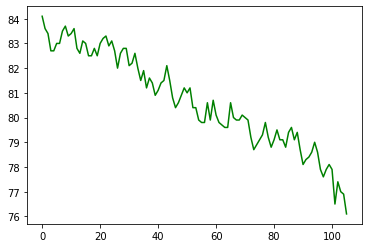

In [3]:
plt.plot(data,c='g')
plt.show()